## Initial PATH

In [1]:
import os
ROOT_PATH = "/home/jovyan/ChestXray-14"
INPUT_PATH = "/home/jovyan/ChestXray-14/dataset/ChestXray NIH"
INPUT_PATH = os.path.abspath(INPUT_PATH)

In [2]:
BATCH_SIZE = 128 # 128 only on Binary Classification
IMG_SIZE = 224
SEED = 42

In [3]:
EXPERIMENT_NAME = "binary_dataset"
OUT_PATH = os.path.abspath(f"{INPUT_PATH}/data/{EXPERIMENT_NAME}")
OUT_PATH

'/home/jovyan/ChestXray-14/dataset/ChestXray NIH/data/binary_dataset'

## Load Full Dataset

In [4]:
import pandas as pd
DEFAULT_DISPLAY_ROWS = 10 # defualt is 10
pd.set_option('display.max_rows', DEFAULT_DISPLAY_ROWS)

In [5]:
FILE_PATH = f"{INPUT_PATH}/preprocessed_data.csv"

In [6]:
df = pd.read_csv(FILE_PATH, index_col=0)
df = df.reset_index()
df["index"] = df["index"].apply(
    lambda x: os.path.abspath(f"{ROOT_PATH}/{x}")
)
df = df.set_index("index")
df

,No Finding,Atelectasis,Consolidation,Infiltration,Pneumothorax,Edema,Emphysema,Fibrosis,Effusion,Pneumonia,Pleural_Thickening,Cardiomegaly,Nodule,Mass,Hernia
index,,,,,,,,,,,,,,,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_000.png,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_001.png,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000001_002.png,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000002_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_001/images/00000003_000.png,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030801_001.png,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030802_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030803_000.png,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Preprocessing

In [7]:
import numpy as np
import sys
sys.path.append('/home/jovyan/ChestXray-14')

In [8]:
from tqdm.notebook import tqdm
from modules.utils import serialize_fold

2023-04-10 04:44:03.804886: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.utils import shuffle

df = df.astype("int16")
df = shuffle(df, random_state=SEED)
# df["Abnormal"] = (df["No Finding"] == 0).astype('int16')
df_temp = df[["No Finding"]].copy()
df1, df2, df3, df4, df5 = np.split(df_temp, 5)
NUM_TO_SPLIT_FILES = 100

In [11]:
df_temp

,No Finding
index,
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_010/images/00022260_003.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_006/images/00012048_007.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_007/images/00014352_005.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_003/images/00006040_001.png,1
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_005/images/00011202_002.png,1
...,...
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_009/images/00018865_040.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_012/images/00030028_001.png,0
/home/jovyan/ChestXray-14/dataset/ChestXray NIH/images_011/images/00027679_000.png,1


In [12]:
(df_temp['No Finding'] == 1).sum(), (df_temp['No Finding'] == 0).sum()

(60361, 51759)

>> logging df_new: 1    60361
0    51759
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Binary class             Count
Abnormal    51759
No Finding  60361


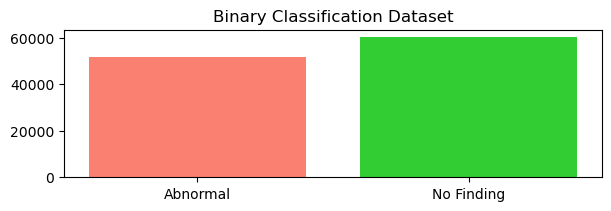

In [23]:
import matplotlib.pyplot as plt

def plot_label_histogram_full(df_train):
    
    count_class_train = {}
    for each_class in df_train.columns[:] :
        df_new = df_train[each_class].value_counts() 
        print(">> logging", "df_new:", df_new)
        count_class_train["Abnormal"] = [df_new[0]]
        count_class_train[df_new.name] = [df_new[1]]

    df_count_class_train = pd.DataFrame(count_class_train).T
    df_count_class_train.set_axis(["Count"], axis="columns", inplace=True)

    print("======== " * 10)
    print(f">> Binary class", df_count_class_train)
    
    fig, (ax1) = plt.subplots(
        nrows=1, 
        ncols=1,
        constrained_layout = True,
        figsize=(6,2)
    )
    
    X_LABELS = df_count_class_train.index
    X_axis = np.arange(len(df_count_class_train))
    ax1.set_xticks(X_axis, X_LABELS)

    ax1.set_title("Binary Classification Dataset")
    ax1.bar(X_axis, df_count_class_train["Count"], 0.8, label="Binary Classification Dataset",
            color=["Salmon", "limegreen"])
    # plt.legend()
    plt.show()
    
plot_label_histogram_full(df_temp)

## EDA

>> logging df_new: 1    48201
0    41495
Name: No Finding, dtype: int64
>> logging df_new: 1    12160
0    10264
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Train Fold 0             Count
Abnormal    41495
No Finding  48201
>> Test Fold 0             Count
Abnormal    10264
No Finding  12160
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


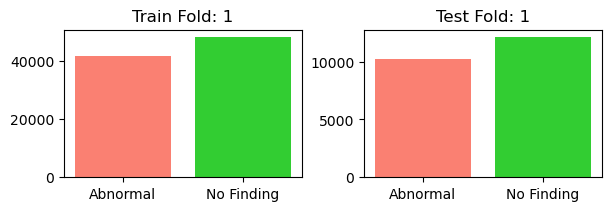

>> logging df_new: 1    48321
0    41375
Name: No Finding, dtype: int64
>> logging df_new: 1    12040
0    10384
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Train Fold 1             Count
Abnormal    41375
No Finding  48321
>> Test Fold 1             Count
Abnormal    10384
No Finding  12040
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


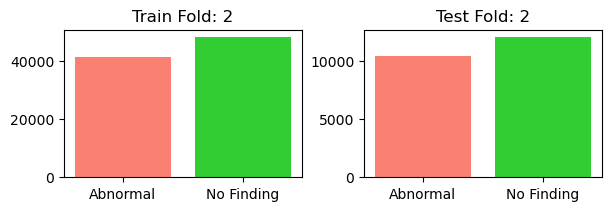

>> logging df_new: 1    48244
0    41452
Name: No Finding, dtype: int64
>> logging df_new: 1    12117
0    10307
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Train Fold 2             Count
Abnormal    41452
No Finding  48244
>> Test Fold 2             Count
Abnormal    10307
No Finding  12117
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


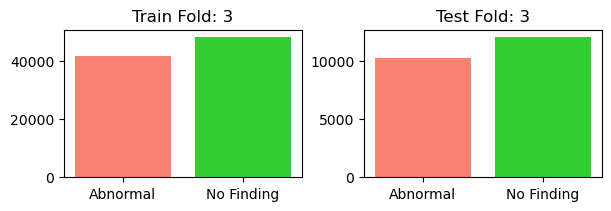

>> logging df_new: 1    48416
0    41280
Name: No Finding, dtype: int64
>> logging df_new: 1    11945
0    10479
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Train Fold 3             Count
Abnormal    41280
No Finding  48416
>> Test Fold 3             Count
Abnormal    10479
No Finding  11945
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


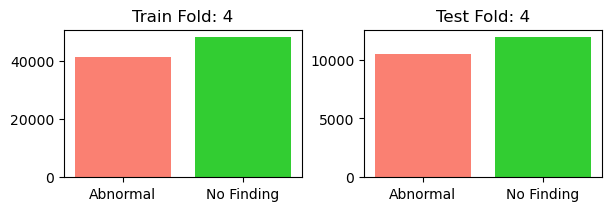

>> logging df_new: 1    48262
0    41434
Name: No Finding, dtype: int64
>> logging df_new: 1    12099
0    10325
Name: No Finding, dtype: int64
======== ======== ======== ======== ======== ======== ======== ======== ======== ======== 
>> Train Fold 4             Count
Abnormal    41434
No Finding  48262
>> Test Fold 4             Count
Abnormal    10325
No Finding  12099
    Dataset Infomation:
        >> Train: 89,696
        >> Test: 22,424
        >> Total: 112,120
    


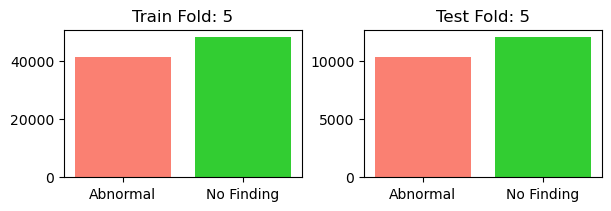

In [19]:
import matplotlib.pyplot as plt

def plot_label_histogram(fold_num, df_train, df_test):
    
    count_class_train = {}
    for each_class in df_train.columns[:] :
        df_new = df_train[each_class].value_counts() 
        print(">> logging", "df_new:", df_new)
        count_class_train["Abnormal"] = [df_new[0]]
        count_class_train[df_new.name] = [df_new[1]]

    df_count_class_train = pd.DataFrame(count_class_train).T
    df_count_class_train.set_axis(["Count"], axis="columns", inplace=True)
    
    count_class = {}
    for each_class in df_test.columns[:] :
        df_new = df_test[each_class].value_counts() 
        print(">> logging", "df_new:", df_new)
        count_class["Abnormal"] = [df_new[0]]
        count_class[df_new.name] = [df_new[1]]

    df_count_class = pd.DataFrame(count_class).T
    df_count_class.set_axis(["Count"], axis="columns", inplace=True)

    print("======== " * 10)
    print(f">> Train Fold {fold_num}", df_count_class_train)
    print(f">> Test Fold {fold_num}", df_count_class)
    
    print(f"""\
    Dataset Infomation:
        >> Train: {len(df_train) :,}
        >> Test: {len(df_test) :,}
        >> Total: {len(df_train) + len(df_test) :,}
    """)
    
    fig, (ax1, ax2) = plt.subplots(
        nrows=1, 
        ncols=2,
        constrained_layout = True,
        figsize=(6,2)
    )
    
    ax1.set_title(f"Train Fold: {fold_num+1}")
    X_LABELS = df_count_class_train.index
    X_axis = np.arange(len(df_count_class_train))
    ax1.set_xticks(X_axis, X_LABELS)

    ax1.bar(X_axis, df_count_class_train["Count"], 0.8, label="Binary Classification Dataset",
            color=["Salmon", "limegreen"])
    # plt.legend()
    # plt.show()

    plt.title(f"Test Fold: {fold_num+1}")
    X_LABELS = df_count_class.index
    X_axis = np.arange(len(df_count_class))
    ax2.set_xticks(X_axis, X_LABELS)

    ax2.bar(X_axis, df_count_class["Count"], 0.8, label="Binary Classification Dataset",
            color=["Salmon", "limegreen"])
    # plt.legend()
    plt.show()
    
    
for (fold_num, (df_train, df_test)) in enumerate([
    (pd.concat([df2, df3, df4, df5]), df1),
    (pd.concat([df1, df3, df4, df5]), df2),
    (pd.concat([df1, df2, df4, df5]), df3),
    (pd.concat([df1, df2, df3, df5]), df4),
    (pd.concat([df1, df2, df3, df4]), df5)
        ]):
    
    plot_label_histogram(fold_num, df_train, df_test)